In [1]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# === CELL TYPE: IMPORTS AND SETUP 
import sys
!conda install -c conda-forge --yes --prefix {sys.prefix} pycountry
!conda install -c conda-forge --yes --prefix {sys.prefix} folium
import os                           # for testing use only
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt      
from matplotlib.font_manager import FontProperties
import math
import seaborn as sns
import pycountry
import folium
from folium.plugins import MarkerCluster
from collections import Counter
from sklearn.decomposition import PCA
%matplotlib inline

Solving environment: ...working... done

# All requested packages already installed.

Failed to create temp directory "C:\Users\Shahar Azar\AppData\Local\Temp\conda-<RANDOM>\" 
Solving environment: ...working... done

# All requested packages already installed.

Failed to create temp directory "C:\Users\Shahar Azar\AppData\Local\Temp\conda-<RANDOM>\" 


In [2]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# ------------>>>>>>>> CSV functions <<<<<<<<------------
def load_csv(file_name):
    csv = pd.read_csv(file_name, encoding= 'unicode_escape',low_memory=False)
    return csv

In [3]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# ------------>>>>>>>> File names <<<<<<<<------------
tvshow_complete_file_name = '.' + os.sep + 'data' + os.sep + "TVShow_complete" + '.csv'
tvshow_best_file_name = '.' + os.sep + 'data' + os.sep + "TVShow_best" + '.csv'

In [4]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# ------------>>>>>>>> Genre arrays <<<<<<<<------------
tvshow_genre_names = ['action','adventure','scifi','fantasy','crime','mystery','sport','history','war','documentary','western','music','talkshow','drama','animation','comedy','thriller','family','romance','horror','short_','realitytv','gameshow','biography','musical','news']
movie_genre_names = ['action','adventure','scifi','fantasy','crime','mystery','sport','history','war','documentary','western','music','talkshow','drama','animation','comedy','thriller','family','romance','horror','short_','realitytv','gameshow','biography','musical','news', 'filmnoir', 'adult']

In [5]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# ------------>>>>>>>> Load the df <<<<<<<<------------
df = load_csv(tvshow_complete_file_name)
best_df = load_csv(tvshow_best_file_name)

In [6]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# ------------>>>>>>>> Genre to ratio functions <<<<<<<<------------
def len_df(df, col, val):
    return len(df[df[col] == val])

def create_genre_ratio(df, genres):
    amounts = []
    for g in genres:
        amount = len_df(df, g, 1)
        amounts.append(amount)
    return amounts

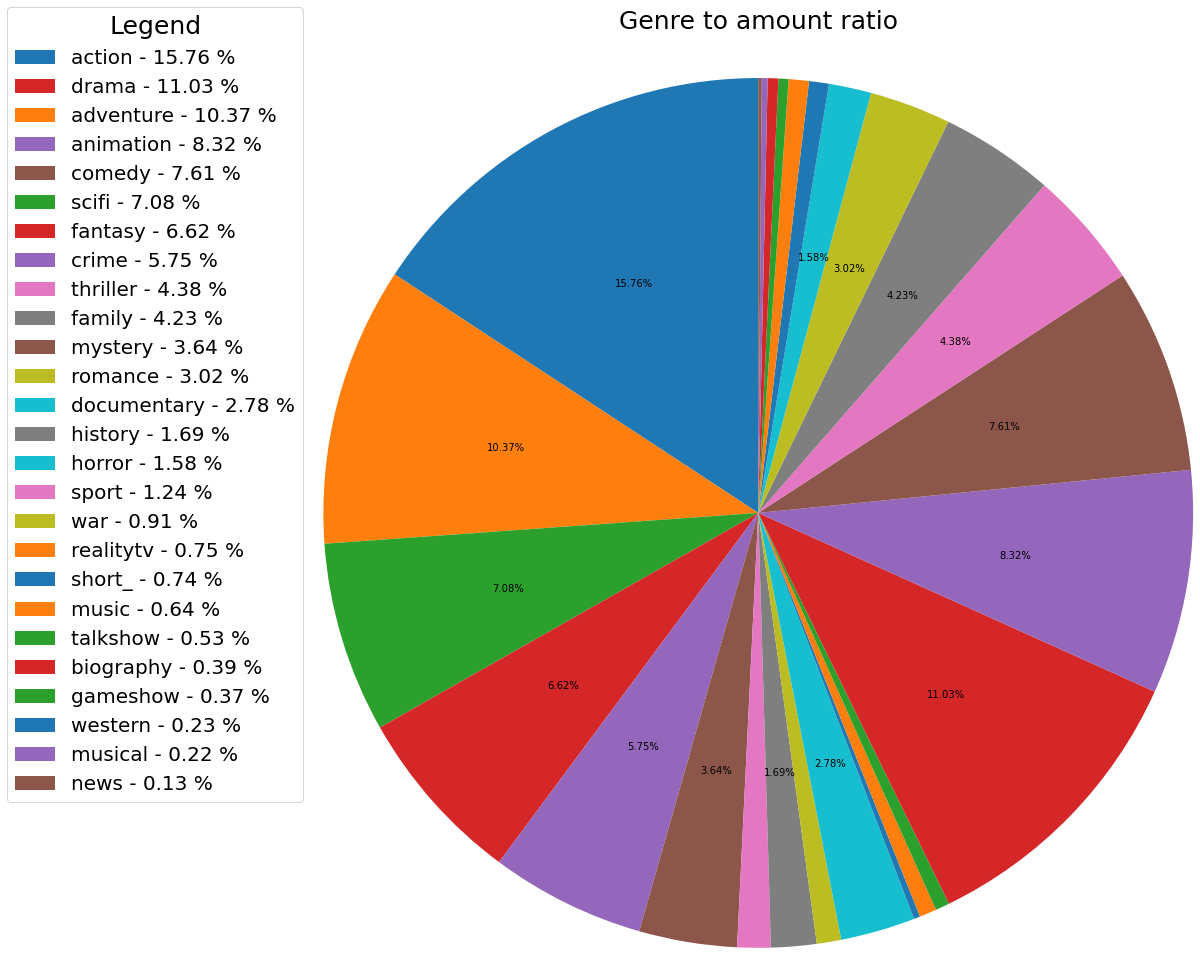

In [7]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# ------------>>>>>>>> Create genre to ratio pie & legend <<<<<<<<------------
def autopct(pct): # only show the label when it's > 1.5%
    return ('%.2f%%' % pct) if pct > 1.5 else ''
genres = np.char.array(tvshow_genre_names)
amounts = np.array(create_genre_ratio(best_df, tvshow_genre_names))
porcent = 100.*amounts/amounts.sum()

# create pie
patches, texts, b = plt.pie(create_genre_ratio(best_df, tvshow_genre_names), autopct=autopct, startangle=90, radius=5)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(genres, porcent)]

# add title
plt.title('Genre to amount ratio',fontsize=25, y=2.7)
# sort legend
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, amounts),
                                          key=lambda x: x[2],
                                          reverse=True))

# create legend
plt.legend(patches, labels,title="Legend",title_fontsize=25, loc='center left', bbox_to_anchor=(-3, 1),
           fontsize=20)
  
# showing the plot
plt.show()

In [8]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# ------------>>>>>>>> AmountPerYear plot functions <<<<<<<<------------
def get_amount_for_year(df, genre, year):
    return len(df[(df['StartYear'] == year) & (df[genre] == 1)])

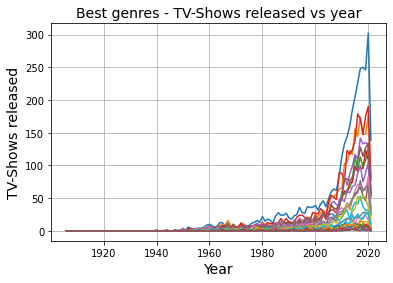

In [9]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# ------------>>>>>>>> Create amount per year plot (best) <<<<<<<<------------
years = df['StartYear'].unique()
years.sort()
amountPerYearPlots =[]

for genre in tvshow_genre_names:
    countPerYear =[]

    for year in years:
        count = get_amount_for_year(best_df, genre, year)
        countPerYear.append(count)
        
    handle, = plt.plot(years, countPerYear, label = genre)
    amountPerYearPlots.append(handle)

# plt.legend(handles=amountPerYearPlots, title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Best genres - TV-Shows released vs year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('TV-Shows released', fontsize=14)
plt.grid(True)
plt.show()

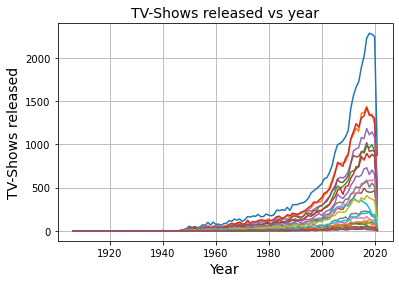

In [10]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# ------------>>>>>>>> Create amount per year plot (all) <<<<<<<<------------
years = df['StartYear'].unique()
years.sort()
amountPerYearPlots =[]

for genre in tvshow_genre_names:
    countPerYear =[]

    for year in years:
        count = get_amount_for_year(df, genre, year)
        countPerYear.append(count)
        
    handle, = plt.plot(years, countPerYear, label = genre)
    amountPerYearPlots.append(handle)

# plt.legend(handles=amountPerYearPlots, title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('TV-Shows released vs year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('TV-Shows released', fontsize=14)
plt.grid(True)
plt.show()

In [11]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# ------------>>>>>>>> Necessary arrays to create the world maps <<<<<<<<------------
#https://towardsdatascience.com/using-python-to-create-a-world-map-from-a-list-of-country-names-cd7480d03b10
countries = ['usa', 'uk', 'japan', 'spain', 'poland', 'hungary', 'mexico', 'malta', 'france', 'southkorea', 'canada', 'italy', 'sweden', 'turkey', 'india', 'israel', 'germany', 'australia', 'china', 'taiwan', 'latvia', 'ireland', 'southafrica', 'norway', 'colombia', 'newzealand', 'brazil', 'philippines', 'denmark', 'singapore', 'hongkong', 'lithuania', 'belgium', 'austria', 'argentina', 'netherlands', 'serbia', 'russia', 'egypt', 'uzbekistan', 'lebanon', 'romania', 'westgermany', 'bulgaria', 'luxembourg', 'cyprus', 'yugoslavia', 'czechrepublic', 'thailand', 'isleofman', 'ukraine', 'chile', 'vietnam', 'syria', 'tunisia', 'croatia', 'malaysia', 'peru', 'iran', 'kazakhstan', 'sovietunion', 'senegal', 'portugal', 'indonesia', 'georgia', 'morocco', 'pakistan', 'venezuela', 'bangladesh', 'switzerland', 'saudiarabia', 'finland', 'eastgermany', 'srilanka', 'armenia', 'bosniaandherzegovina', 'zimbabwe', 'unitedarabemirates', 'slovakia', 'greece', 'jordan', 'iraq', 'czechoslovakia', 'iceland', 'serbiaandmontenegro', 'kuwait', 'estonia', 'afghanistan', 'bahrain', 'qatar', 'cuba', 'myanmar', 'tajikistan', 'turkmenistan', 'uruguay', 'belarus', 'costarica', 'bahamas', 'ecuador', 'antarctica', 'algeria', 'federalrepublicofyugoslavia', 'u.s.virginislands', 'jamaica', 'liechtenstein', 'sanmarino', 'slovenia', 'republicofnorthmacedonia', 'nigeria', 'guadeloupe', 'botswana', 'puertorico', 'dominicanrepublic', 'nepal', 'montenegro', 'kenya', 'kosovo', 'uganda', 'moldova', 'paraguay', 'ghana', 'guatemala', 'caymanislands', 'northkorea', 'holysee(vaticancitystate)', 'ethiopia', 'cambodia', 'azerbaijan', "c?ted'ivoire", 'korea']
latitude = ['39.540389757813024','54.67849223324534','36.6432557546351','40.45689881784951','52.55503956464183','47.17662128076218','24.138488199894745','35.892320564538906','47.4104831817486','36.72761165941122','60.48663236692108','42.99671210048975','64.10112322561353','39.13793781785037','22.794079120128842','31.751766501650796','51.44735218729841','-25.18610063108492','34.70461026626381','23.721380915916697','56.99797284772936','53.46715333061227','-29.60087082463532','61.69715829061012','61.69715829061012','-42.37362172387959','-8.9641537741057','12.518439816033677','55.575280233571306','1.3503667044356393','22.327258867283405','55.604917056390605','50.85462473760865','47.58657814130691','-35.00107218426390','52.18994309055366','44.046858084794664','62.537037390441526','26.638800945150585','41.983592588465655','34.08920006978046','45.7362344567491','51.13134999757965','42.50159973841828','49.7716942528208','35.046175728328905','44.81056848951802','50.126988091304575','15.343613919435318','54.22908702090084','48.96050995790609','-26.49735675266946','14.43248797900597','35.01057772515683','34.14398575570157','45.08791710713416','3.623745370127996','-10.55761182889407','32.17768543832279','48.243413573200314','55.758878919033265','14.364552175960926','39.71697502206277','-4.213905210941397','42.18113922959452','31.96776189156212','29.95942371889907','7.029532516779694','24.153910796513333','46.79822690224514','23.591157306236948','61.83495482261011','51.21400785127738','7.57314180456884','40.304422022892126','44.60756762753234','-19.01246639213065','23.937501333130843','48.79821869032323','39.49418775544764','31.28651557485719','33.081212544890604','50.08337105682166','64.94605055878561','44.14942569147805','29.30317848091262','58.639348845150884','33.88900071165511','26.035731651424694','25.320706580470205','21.592233725760067','21.583706187521045','38.536581741550584','38.95942359432578','-32.84088386051847','53.21848435453311','10.346104931093205','24.727660785858802','-1.487017599125011','-76.20148123144935','27.994585025417976','47.42649033801809','17.737264771215912','18.142015849044167','47.18944354384147','43.93834410810362','46.0739770734181','41.62464552912942','9.601660119693687','16.245717537648627','-22.19521547305474','18.19991944220025','18.916191185117285','28.25327784420257','42.88724326720587','0.4620597159851561','42.588605586280174','1.476941174963573','47.5579625384884','-23.26737139226363','7.931130884859782','14.70226653286109','19.31324904085989','40.04989932700513','41.90193435106306','8.817667071363655','12.662179276334367','40.380002670709665','7.615455439493094','38.268313003514905']
longitude = ['-101.43105998687854','-2.681131004673826','139.47654422988268','-4.056829345766064','19.31337407423051','19.440627177280025','-102.60181263027005','14.429170913178531','2.3208270781421954','127.78678604167649','-111.10305563929035','12.565682961040158','16.73635531292544','35.20788917362889','78.6452910431939','34.95256078575474','9.842404740060951','134.77757485386653','103.93965078663193','121.03208516787178','25.841338748676932','-7.823402771190586','24.69883300376182','9.735126638886529','9.735126638886529','172.30075352454529','-55.96924834605226','123.24302833776594','10.19217775405456','103.8675508029527','114.16202388391652','23.888767862475','4.369866025552224','14.148883375793893','-64.19024336355449','5.624495080338095','20.778119054890542','93.26292584872286','29.68022241740317','64.54580312615286','35.9010971633275','25.1505357367028','7.089830653895806','25.163828509292408','6.095345197065297','33.23281848251823','20.427879027141586','14.44734656677044','101.36747877060245','-4.517229750597144','31.87849196893616','-70.07846968832828','108.49060702495368','38.4951794816041','9.668629754481012','14.81199696914663','102.28778439506006','-75.23015923507565','54.68512435195513','67.12182977900868','37.60684120911135','-14.517491341208165','-8.360312580696291','123.30903897650747','43.40667856852368','-6.207955397114096','68.89943899137432','-66.01279282364641','90.18813903323439','7.975794761909576','45.72250692172829','26.62797028021719','13.044420272008661','80.62322959399869','44.57338158744427','17.354961946313757','29.534908187542513','54.09614550139429','19.515708127553655','22.45802383632398','36.501166792264044','43.0531794570832','14.417274550303125','-19.180004705058522','20.866009676560104','47.4284736301426','25.690150119628388','64.86080532410952','50.529864959156214','51.19564273456595','-78.93926138769102','96.24173051585875','71.14735138497247','59.158813505082676','-56.08309862050419','28.10847496973046','-84.09729945218777','-78.0345306776958','-78.57041399267452','23.17922385450322','3.2463945396682745','8.571755615284864','-64.76893174073024','-77.26801756334197','9.54420242746474','12.460071865176504','14.61507663866133','21.69441175629497','8.202291728946548','-61.55638673706461','23.553219676125682','-66.54956334397573','-70.26797497278665','83.84226998450083','19.278506856743256','37.96052469419428','20.88418972567881','32.21255741859358','28.531361040592575','-58.44001916203394','-1.0990902352771055','-90.45512949519068','-81.25406351521463','127.1287980769657','12.455844502217728','39.3875860802198','104.87902881255297','47.957337545832445','-5.482634991046534','127.14246011810208']

In [12]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# ------------>>>>>>>> Necessary functions for the world map plots <<<<<<<<------------
def get_amount_for_countries(df, country):
    return len(df[(df[country] == 1)])

In [13]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# ------------>>>>>>>> Create the data for the world maps <<<<<<<<------------
amountPerCountry = []
for country in countries:
    length = get_amount_for_countries(best_df, country)
    amountPerCountry.append(length)

tvshowsCountrySum = sum(amountPerCountry)
countryPercentages = []
for amount in amountPerCountry:
    perc = (amount/tvshowsCountrySum) * 100
    countryPercentages.append(perc)

In [14]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# ------------>>>>>>>> Create origin of the best tv-shows <<<<<<<<------------
#empty map
world_map= folium.Map(tiles="cartodbpositron")
for i in range(0,len(countries)):
    folium.Circle(
      location=[latitude[i], longitude[i]],
      popup=countries[i],
      radius=float(amountPerCountry[i]) * 1000,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(world_map)
world_map

In [15]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# ------------>>>>>>>> Create distribution of best tv-shows map <<<<<<<<------------
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(countries)):
        lat = latitude[i]
        long = longitude[i]
        radius=5
        popup_text = """Country : {}<br>
                    %of TV Shows : {}<br>"""
        popup_text = popup_text.format(countries[i],
                                   countryPercentages[i]
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map


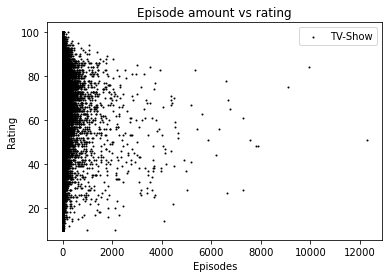

In [16]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# ------------>>>>>>>> Create scatter plot of episode amount vs rating <<<<<<<<------------
plt.scatter(df['Episodes'],df['Rating'], label='TV-Show',color='black', s=1)
plt.title('Episode amount vs rating')
plt.xlabel('Episodes')
plt.ylabel('Rating')
plt.legend()
plt.show()

In [17]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# ------------>>>>>>>> Necessary array to create the barh plot <<<<<<<<------------
languages = ['english', 'japanese', 'spanish', 'russian', 'serbian', 'latin', 'egyptian(ancient)', 'arabic', 'french', 'turkish', 'german', 'klingon', 'dutch', 'lithuanian', 'greek', 'chinese', 'urdu', 'hindi', 'korean', 'mandarin', 'cantonese', 'catalan', 'polish', 'romanian', 'italian', 'albanian', 'danish', 'kurdish', 'welsh', 'swedish', 'bulgarian', 'hebrew', 'hungarian', 'indonesian', 'portuguese', 'thai', 'ukrainian', 'uzbek', 'czech', 'vietnamese', 'tagalog', 'finnish', 'chechen', 'slovak', 'americansignlanguage', 'middleenglish', 'assyrianneo-aramaic', 'lingala', 'swahili', 'persian', 'esperanto', 'maori', 'xhosa', 'tamil', 'bosnian', 'croatian', 'zulu', 'afrikaans', 'southernsotho', 'pushto', 'norwegian', 'flemish', 'none', 'navajo', 'divehi', 'filipino', 'malay', 'bhojpuri', 'bengali', 'telugu', 'ukrainiansignlanguage', 'georgian', 'maltese', 'irish', 'tlingit', 'serbo-croatian', 'braziliansignlanguage', 'visayan', 'sinhalese', 'marathi', 'minnan', 'armenian', 'aboriginal', 'gallegan', 'icelandic', 'macedonian', 'latvian', 'estonian', 'swissgerman', 'cree', 'amharic', 'slovenian', 'belarusian', 'indiansignlanguage', 'basque', 'ancient(to1453)', 'oldenglish', 'norse', 'old', 'luxembourgish', 'sioux', 'fon', 'mongolian', 'uighur', 'kannada', 'malayalam', 'yiddish', 'wolof', 'romany', 'khmer', 'northamericanindian', 'nepali', 'kirghiz', 'scottishgaelic', 'crow', 'punjabi', 'breton', 'cornish', 'abkhazian', 'tsonga', 'aramaic', 'neapolitan', 'saami', 'tswana', 'corsican', 'britishsignlanguage', 'oriya', 'occitan', 'shanghainese', 'burmese', 'mapudungun', 'parsee', 'hokkien', 'shona', 'hakka', 'tibetan', 'kazakh', 'somali', 'faroese', 'shoshoni', 'dari', 'gujarati', 'azerbaijani', 'tatar', 'samoan', 'tigrigna', 'nahuatl', 'maya', 'hassanya', 'assamese', 'greenlandic', 'berberlanguages', 'mandingo']

In [18]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# ------------>>>>>>>> Necessary functions for the array to create the barh plot <<<<<<<<------------
def get_amount_for_languages(df, language):
    return len(df[(df[language] == 1)])

In [19]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# ------------>>>>>>>> Create the data for the barh plot <<<<<<<<------------
amountPerLanguage = []
for language in languages:
    length = get_amount_for_languages(df, language)
    amountPerLanguage.append(length)

tvshowsLanguageSum = sum(amountPerLanguage)
languagePercentages = []
for amount in amountPerLanguage:
    perc = (amount/tvshowsLanguageSum) * 100
    languagePercentages.append(perc)

In [20]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# ------------>>>>>>>> Sort the data for the barh plot <<<<<<<<------------
list1 = amountPerLanguage
list2 = languages
list1, list2 = zip(*sorted(zip(list1, list2)))
amountPerLanguage = list1
languages = list2

amountPerLanguage = amountPerLanguage[::-1]
languages = languages[::-1]

amountPerLanguage = amountPerLanguage[0:10]
languages = languages[0:10]

print(amountPerLanguage)
print(languages)

(41855, 12491, 3897, 2914, 2619, 2502, 1725, 1576, 1287, 1284)
('english', 'japanese', 'spanish', 'french', 'german', 'russian', 'korean', 'turkish', 'hindi', 'portuguese')


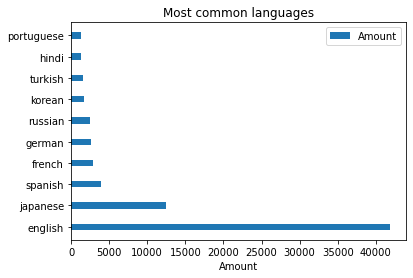

In [21]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# ------------>>>>>>>> Create bar plot for most common languages <<<<<<<<------------ 
 
width = 0.3
   
fig, ax = plt.subplots() 
   
ax.barh(languages, amountPerLanguage, width, 
        label ='Amount') 
   
ax.set_xlabel('Amount') 
ax.legend() 
   
ax.set_title('Most common languages') 
   
plt.show() 

In [22]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# ------------>>>>>>>> Necessary array to create the barh plot <<<<<<<<------------
languages = ['english', 'japanese', 'spanish', 'russian', 'serbian', 'latin', 'egyptian(ancient)', 'arabic', 'french', 'turkish', 'german', 'klingon', 'dutch', 'lithuanian', 'greek', 'chinese', 'urdu', 'hindi', 'korean', 'mandarin', 'cantonese', 'catalan', 'polish', 'romanian', 'italian', 'albanian', 'danish', 'kurdish', 'welsh', 'swedish', 'bulgarian', 'hebrew', 'hungarian', 'indonesian', 'portuguese', 'thai', 'ukrainian', 'uzbek', 'czech', 'vietnamese', 'tagalog', 'finnish', 'chechen', 'slovak', 'americansignlanguage', 'middleenglish', 'assyrianneo-aramaic', 'lingala', 'swahili', 'persian', 'esperanto', 'maori', 'xhosa', 'tamil', 'bosnian', 'croatian', 'zulu', 'afrikaans', 'southernsotho', 'pushto', 'norwegian', 'flemish', 'none', 'navajo', 'divehi', 'filipino', 'malay', 'bhojpuri', 'bengali', 'telugu', 'ukrainiansignlanguage', 'georgian', 'maltese', 'irish', 'tlingit', 'serbo-croatian', 'braziliansignlanguage', 'visayan', 'sinhalese', 'marathi', 'minnan', 'armenian', 'aboriginal', 'gallegan', 'icelandic', 'macedonian', 'latvian', 'estonian', 'swissgerman', 'cree', 'amharic', 'slovenian', 'belarusian', 'indiansignlanguage', 'basque', 'ancient(to1453)', 'oldenglish', 'norse', 'old', 'luxembourgish', 'sioux', 'fon', 'mongolian', 'uighur', 'kannada', 'malayalam', 'yiddish', 'wolof', 'romany', 'khmer', 'northamericanindian', 'nepali', 'kirghiz', 'scottishgaelic', 'crow', 'punjabi', 'breton', 'cornish', 'abkhazian', 'tsonga', 'aramaic', 'neapolitan', 'saami', 'tswana', 'corsican', 'britishsignlanguage', 'oriya', 'occitan', 'shanghainese', 'burmese', 'mapudungun', 'parsee', 'hokkien', 'shona', 'hakka', 'tibetan', 'kazakh', 'somali', 'faroese', 'shoshoni', 'dari', 'gujarati', 'azerbaijani', 'tatar', 'samoan', 'tigrigna', 'nahuatl', 'maya', 'hassanya', 'assamese', 'greenlandic', 'berberlanguages', 'mandingo']

In [23]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# ------------>>>>>>>> Create the data for the barh plot <<<<<<<<------------
amountPerLanguage = []
for language in languages:
    length = get_amount_for_languages(best_df, language)
    amountPerLanguage.append(length)

tvshowsLanguageSum = sum(amountPerLanguage)
languagePercentages = []
for amount in amountPerLanguage:
    perc = (amount/tvshowsLanguageSum) * 100
    languagePercentages.append(perc)

In [24]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# ------------>>>>>>>> Sort the data for the barh plot <<<<<<<<------------
list1 = amountPerLanguage
list2 = languages
list1, list2 = zip(*sorted(zip(list1, list2)))
amountPerLanguage = list1
languages = list2

amountPerLanguage = amountPerLanguage[::-1]
languages = languages[::-1]

amountPerLanguage = amountPerLanguage[0:10]
languages = languages[0:10]

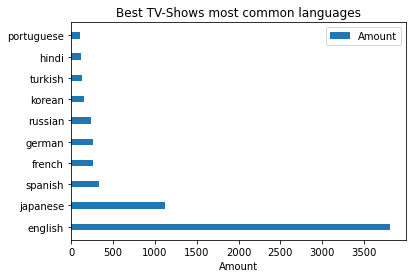

In [25]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# ------------>>>>>>>> Create bar plot for most common languages <<<<<<<<------------ 
 
width = 0.3
   
fig, ax = plt.subplots() 
   
ax.barh(languages, amountPerLanguage, width, 
        label ='Amount') 
   
ax.set_xlabel('Amount') 
ax.legend() 
   
ax.set_title('Best TV-Shows most common languages') 
   
plt.show() 